In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

# Bug localization datasets metrics

In [3]:
dataset = load_dataset('json', data_files='./../../data/lca-bug-localization/bug_localization_data.jsonl')

df = pd.DataFrame(dataset['train'])

In [4]:
df.columns

Index(['id', 'repo_owner', 'repo_name', 'issue_url', 'pull_url', 'comment_url',
       'issue_title', 'issue_body', 'base_sha', 'head_sha', 'diff_url', 'diff',
       'changed_files', 'changed_files_exts', 'changed_files_count',
       'java_changed_files_count', 'kt_changed_files_count',
       'py_changed_files_count', 'code_changed_files_count', 'pull_create_at',
       'stars'],
      dtype='object')

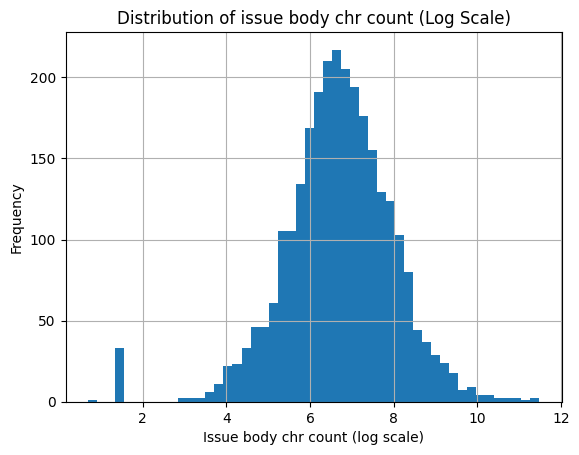

In [5]:
df['issue_body'].apply(lambda x: np.log(len(str(x)))).hist(bins=50)
plt.xlabel('Issue body chr count (log scale)')
plt.ylabel('Frequency')
plt.title(f'Distribution of issue body chr count (Log Scale)')
plt.show()

In [6]:
df['changed_files_count'].value_counts()

changed_files_count
1      591
2      523
3      325
4      221
5      153
      ... 
81       1
440      1
72       1
176      1
80       1
Name: count, Length: 121, dtype: int64

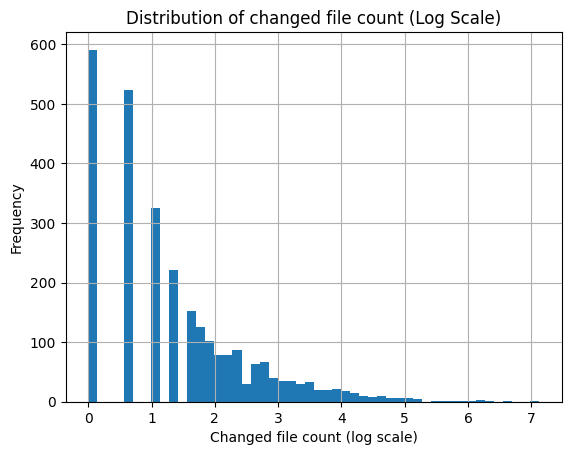

In [7]:
df['changed_files_count'].apply(lambda x: np.log(x)).hist(bins=50)
plt.xlabel('Changed file count (log scale)')
plt.ylabel('Frequency')
plt.title(f'Distribution of changed file count (Log Scale)')
plt.show()

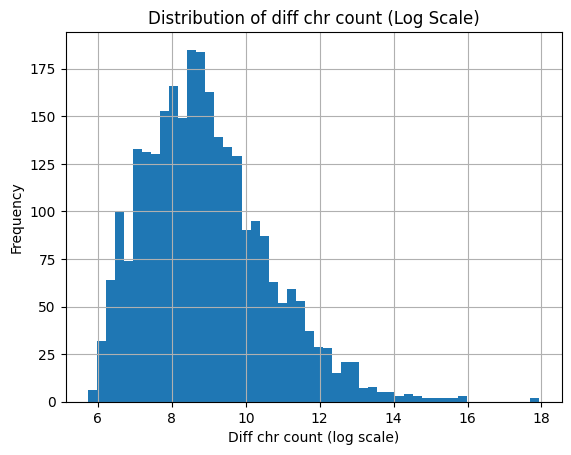

In [8]:
df['diff'].apply(lambda x: np.log(len(x))).hist(bins=50)
plt.xlabel('Diff chr count (log scale)')
plt.ylabel('Frequency')
plt.title(f'Distribution of diff chr count (Log Scale)')
plt.show()

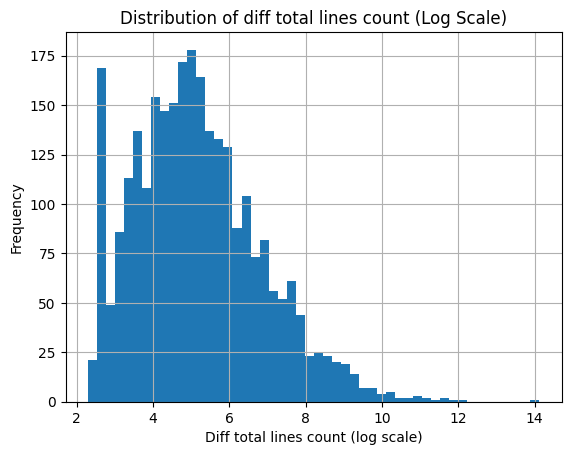

In [9]:
df['diff'].apply(lambda x: np.log(len(x.split('\n')))).hist(bins=50)
plt.xlabel('Diff total lines count (log scale)')
plt.ylabel('Frequency')
plt.title(f'Distribution of diff total lines count (Log Scale)')
plt.show()

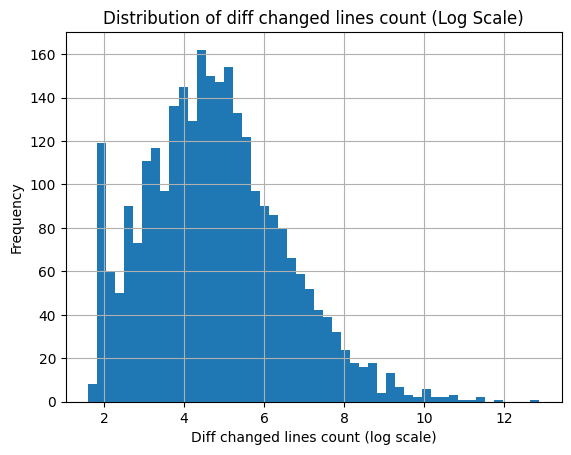

In [13]:
from utils.git_utils import parse_changed_files_and_lines_from_diff

def get_changed_lines_count(diff) -> int:
    changed_files_and_lines = parse_changed_files_and_lines_from_diff(diff)
    changed_lines_count = 0
    for changed_lines_areas in changed_files_and_lines.values():
        for changed_lines_area in changed_lines_areas:
            changed_lines_count += changed_lines_area[1][1]
    
    return changed_lines_count

df['diff'].apply(lambda x: np.log(get_changed_lines_count(x))).hist(bins=50)
plt.xlabel('Diff changed lines count (log scale)')
plt.ylabel('Frequency')
plt.title(f'Distribution of diff changed lines count (Log Scale)')
plt.show()